## Part 1: Full Bayesian Inference

1. Generate 50 2D-data points using the following function: $y = sin(x^2+1)$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

def actual_distribution():
    x = np.arange(0, 1, 1/50)
    y = np.sin(np.power(x,2) + 1)
    return x, y

x, y = actual_distribution() 

2. Add Gaussian random noise to the data

In [2]:
def add_noise(y_curve, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

y_noise = add_noise(y, sigma = 0.05)

3. Show the original curve line and the noisy data.

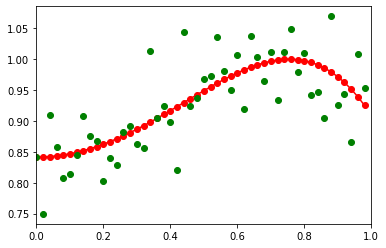

In [3]:
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

4. Compute w based on the full Bayesian inference (by using basis functions like discussed in class).

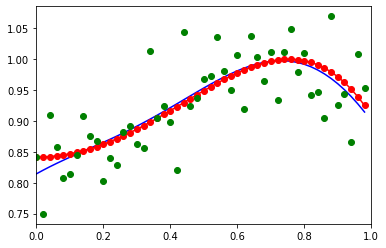

In [4]:
N = 50
M = 4
x_range = 1

s = x_range/(M/2)
miu_vec = np.arange(0, 1, 1/M)

# gaussian basis function
def gaussian_basis(x, miu, s):
    result = np.exp(-np.power((x - miu), 2) / (2 * np.power(s, 2)))
    return result

# function to get phi matrix
def get_phi_gaussian(x_vec, miu_vec, s, N, M):
    phi = np.empty([N, M])
    
    # get the input X matrix
    for i, miu in enumerate(miu_vec):
        for j, x_element in enumerate(x_vec):
            phi[j][i] = gaussian_basis(x_element, miu, s)
        
    return phi

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

def get_input_matrix(x_value, N, M):
    X_input = np.empty([0, N])

    # get the input X matrix
    for m in range(M):
        result_array = np.array([np.power(x_value, m)])
        X_input = np.append(X_input, result_array, axis = 0)
        
    X_input = np.transpose(X_input)
    return X_input

X_input = get_input_matrix(x, N, M)

def get_w_least_sq(x_matrix, y_noise):
    w = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y_noise)
    return w

# estimate beta with some noise level
def get_beta(x_matrix, x, y_noise, N, M):
    w_least_sq = get_w_least_sq(x_matrix, y_noise)
    
    p = np.poly1d(np.flip(w_least_sq))
    y_lsq = p(x)
    
    # calculate beta
    beta = 0
    for n in range(N):
        beta +=  np.power((y_lsq[n] - y_noise[n]), 2)
    beta = 1 / (beta / N)
    
    return beta

beta = get_beta(X_input, x, y_noise, N, M)

# get w with full bayesian
def get_w_fb(beta, alpha, M, phi, t):
    w_fb = beta * np.linalg.inv(alpha * np.identity(M) + beta * phi.T.dot(phi)).dot(phi.T).dot(t)
    return w_fb

alpha = 0.4 # set alpha value

w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)

# get estimated value of y
def get_y_estimated(phi, w):
    return phi.dot(w)

y_estimated = get_y_estimated(phi_matrix, w_fb)

# construct the graph
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

5. Display the estimated values of w

In [5]:
print(w_fb)

[ 1.12741775 -0.55690793 -0.42539676  1.34437851]


6. Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

6.1 Let's set the initial value of alpha to be 5 and beta to be 100.

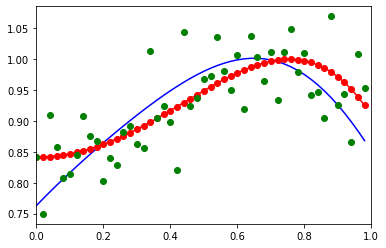

In [6]:
# initial value of alpha and beta
M = 4
alpha = 5
beta = 100

s = x_range/(M/2)
miu_vec = np.arange(0, 1, 1/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

6.2 Let us do not change the alpha, but multiply beta by 250. As we may observe, the change to our graph is not so visible, but the graph is less regularized, and we can see that our curve fitting becomes less underfit.

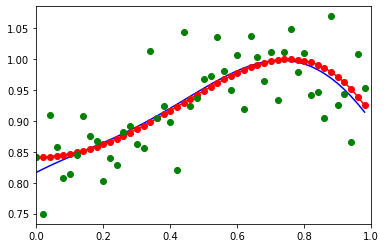

In [7]:
# increase the value of beta without changing alpha
alpha = 5
beta = 100 * 250

w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

6.3 However, if we do not change the beta, but instead multiply alpha by 250. We will observe that our graph has been heavily regularized to the point that it has become underfit.

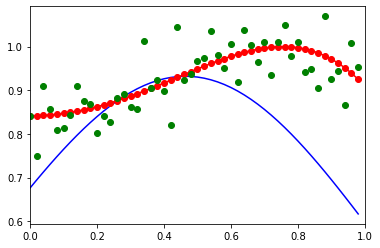

In [8]:
# increase the value of alpha without changing beta
alpha = 5 * 250
beta = 100

w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

6.4 Yet, if we change both alpha and beta, both by multiplying 250, we will notice that our graph is exactly the same as the original one.

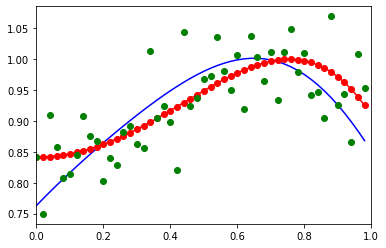

In [9]:
# increase both values of alpha and beta relatively
alpha = 5 * 250
beta = 100 * 250

w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

6.5 Therefore, in conclusion, it is not only alpha or beta that influences the regularization, but the relative division of alpha and beta $\frac{\alpha}{\beta}$ that has influences on regularization. If relative division increases, the regularization becomes more effective; if relative division decreases, the regularization takes less effect and allow more expression of the curve fitting.

We can look into the posterior propability and observe how $\bar{m_N}$ is computed: $$\bar{m_N} = \beta(\alpha \mathbb{I} + \beta \Phi^T \Phi)^{-1} \Phi^T \bar{t}.$$
As we can see, the full bayesian inference is very similar to MAP in the sense that they both provide some regularization, where smaller values of $\bar{w}$ are encouraged. While maximizing the posterior distribution with respect to $\bar{w}$, there is an addition of the regularization term such that the coefficient $\lambda = \frac{\alpha}{\beta}$ will decide the weight of regularization term, as a mechanism to prevent the graph from overfitting when M is set large. Intuitively, the inverse of beta is the noise level and alpha represent the weight of regularizaton. However, such weight must be calculated relative to the noise level in order to control the regularization (whether the curve-fitting is overfiting or not).

7. Show your best fitting: 

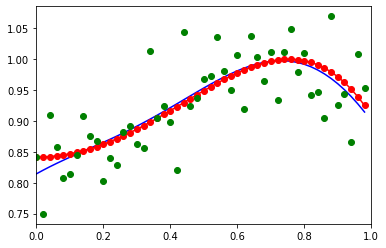

In [10]:
alpha = 0.4
beta = get_beta(X_input, x, y_noise, N, M)

w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

8. Increase the value of M, and discuss how it affects the prediction (curve fitting) and the uncertainty of the prediction.

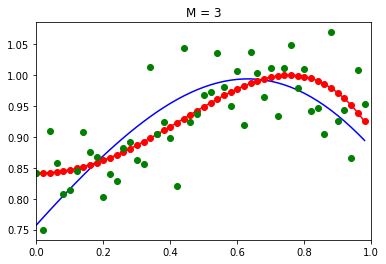

[[ 0.02979045 -0.04767988  0.02352824]
 [-0.04767988  0.07779026 -0.03911308]
 [ 0.02352824 -0.03911308  0.02007575]]


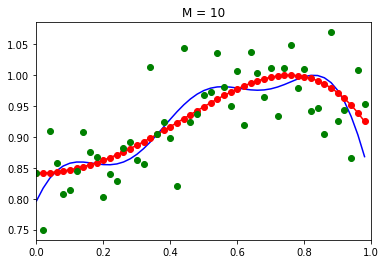

[[ 0.04472175 -0.06864517  0.02305154  0.02131978 -0.01143402 -0.01110347
   0.00691277  0.00563256 -0.00560615  0.00094547]
 [-0.06864517  0.13072572 -0.08405846 -0.0058226   0.0275464   0.00405994
  -0.01512939 -0.00172499  0.01061935 -0.00477082]
 [ 0.02305154 -0.08405846  0.12133871 -0.07633935  0.00066885  0.02236631
  -0.00026664 -0.01042483  0.00131743  0.00276815]
 [ 0.02131978 -0.0058226  -0.07633935  0.13027183 -0.08059479 -0.00365957
   0.02621683  0.00118748 -0.01612956  0.0074843 ]
 [-0.01143402  0.0275464   0.00066885 -0.08059479  0.12595041 -0.07679735
  -0.00065436  0.02143582 -0.00146293 -0.00567233]
 [-0.01110347  0.00405994  0.02236631 -0.00365957 -0.07679735  0.12747771
  -0.08143776  0.00024137  0.02959735 -0.01330685]
 [ 0.00691277 -0.01512939 -0.00026664  0.02621683 -0.00065436 -0.08143776
   0.12495034 -0.07428926  0.00360048  0.01194479]
 [ 0.00563256 -0.00172499 -0.01042483  0.00118748  0.02143582  0.00024137
  -0.07428926  0.12081553 -0.0879458   0.02693889]


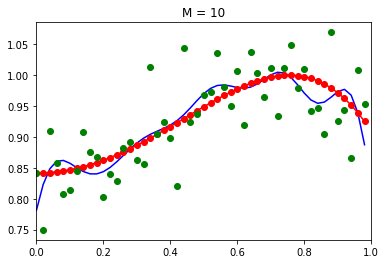

[[ 5.16757761e-02 -7.40795093e-02  1.81176980e-02  2.51883105e-02
  -6.57468713e-03 -1.39698771e-02  2.19164610e-03  8.25496290e-03
  -4.01520841e-04 -4.89077684e-03 -2.72558613e-04  2.86464324e-03
   4.58621865e-04 -1.65044799e-03 -4.46515746e-04  9.31983475e-04
   3.68722043e-04 -5.17908142e-04 -2.78575367e-04  3.43880976e-04]
 [-7.40795093e-02  1.36873068e-01 -8.09912946e-02 -1.11471740e-02
   2.41776847e-02  8.75181991e-03 -1.13087574e-02 -6.31421912e-03
   5.68372668e-03  4.32201380e-03 -2.85271599e-03 -2.84611652e-03
   1.38573409e-03  1.81061696e-03 -6.36430245e-04 -1.10448446e-03
   2.77433627e-04  6.19585718e-04 -1.58172291e-04 -1.78611630e-04]
 [ 1.81176980e-02 -8.09912946e-02  1.25688180e-01 -7.81976814e-02
  -3.84369231e-03  2.34241666e-02  4.16662106e-03 -1.13637789e-02
  -3.54728008e-03  6.00580732e-03  2.70693178e-03 -3.21634847e-03
  -1.93911336e-03  1.70766836e-03  1.33816380e-03 -8.97596915e-04
  -9.12653168e-04  4.93711090e-04  6.49704656e-04 -5.09762297e-04]
 [ 2.51

In [11]:
def get_s_n(alpha, beta, phi, M):
    s_n = np.linalg.inv(alpha * np.identity(M) + beta*phi.T.dot(phi))
    return s_n

M = 3
alpha = 4
beta = get_beta(X_input, x, y_noise, N, M)

s = x_range/(M/2)
miu_vec = np.arange(0, 1, 1/M)
phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)
w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)

s_n = get_s_n(alpha, beta, phi_matrix, M)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 3")
plt.show()
print(s_n)

M = 10
alpha = 4
beta = get_beta(X_input, x, y_noise, N, M)

s = x_range/(M/2)
miu_vec = np.arange(0, 1, 1/M)
phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)
w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)

s_n = get_s_n(alpha, beta, phi_matrix, M)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 10")
plt.show()
print(s_n)

M = 20
alpha = 4
beta = get_beta(X_input, x, y_noise, N, M)

s = x_range/(M/2)
miu_vec = np.arange(0, 1, 1/M)
phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)
w_fb = get_w_fb(beta, alpha, M, phi_matrix, y_noise)
y_estimated = get_y_estimated(phi_matrix, w_fb)

s_n = get_s_n(alpha, beta, phi_matrix, M)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 20")
plt.show()
print(s_n)

As seen above, the first curve fitting is generated when M is set to 3, and the second curve fitting is generated when M is increased to 10. 

Notice on one hand, the curve fitting is much less overfit in the first graph than that in the second graph. On the other hand, the uncertainty of prediction (how good is the predicated $\bar{w}$) actually increases (although some numbers have decreased, which I will explained later) as we increase the value of M.

First of all, M indicates the number of basis we have used in the prediction, and in our case, the basis function is Gaussian. Therefore, as we increase the number of basis, what we are doing is that we are allowing more expressiveness in the curve fitting. We are providing more possible linear combinations of basis, so of course, the curve fitting (prediction) is more likely to overfit. As we increase M, the full bayesian function has more $\bar{w}$, more freedom to fit the curve that maxmizes the posterior probability. Therefore, the curve fitting will be more expressive, but also prone to overfit. But if we would like to prevent overfitting, we can simply increase $\frac{\alpha}{\beta}$ (increase alpha or decrease beta) to increase the weight of regularization term. 

If we increase the number of basis, we may observe that some uncertainty number (number in $\mathbb{S_n}$) actually increases. Well, this is not surprising, because in the covariance matrix, each number is a linear combination of multiplication of two basis. Because we are providing more basis, some linear combinations may not be that good for predicting all data points, so uncertainty may increase for those certain combinations (In other words, as we increase the number of basis, some basis might not be a good fit to support the curve fitting/prediction, so uncertainty may be higher).

However, on the other hand, if we increase the number of basis, the uncertainty of some prediction (as in how good is the predicted $\bar{w}$) also decreases. If we increase the number of basis, then it is more probable some basis fit a specific pattern of data. Therefore. Intuitively, as we increase the number of basis, it is more probable that some basis can provide better expressiveness for curve fitting. (And that may lead to overfitting)


9. Explain how useful p(w|t) for the training and testing stages.

$p(\bar{w}|\bar{t})$ is very useful for the training stage. In MAP, only $\bar{w}^*$ is available through optimization because we have not included evidence in the calculation. So MAP does not provide probability information. However, in full Bayesian, we obtain p(\bar{w}|\bar{t}) by calculating: $$p(\bar{w}|\bar{t}) = \frac{p(\bar{t}|\bar{w})p(\bar{w})}{p(\bar{t})}.$$ We not only get $\bar{w}^*$, the best $\bar{w}$ for our prediction, we also get the uncertain information of prediction (how good is our predicted $\bar{w}$). This information is useful in the training stage because this information can help us maybe modify the model parameter, change basis functions etc. to achieve better prediction.

However, this is not very useful for our testing stage, because this probability only gives us how good is our **predicted $\bar{w}$** for predicting **training data**. It does not tell us the uncertainty of prediction when the new data comes in the testing stage. What we are interested in the testing stage is not $\bar{w}$, but instead how probable is the new estimation $t_{new}$ given a new data $x_{new}$, where $t_{new}$ and $x_{new}$ is not observed in the training stage. Therefore, $p(\bar{w}|\bar{t})$ is not useful for the testing stage.

## Part 2: Sequential Bayesian Learning

1. Generate 50 2D-data points using the following function: $y = sin(x^2+1)$

In [12]:
x, y = actual_distribution() 

2. Add Gaussian random noise to the data

In [13]:
y_noise = add_noise(y, sigma = 0.05)

3. Fit the generated noisy data sequentially (5 data for each sequence).

In [14]:
N_1 = 5
M = 4

s_1 = 1/(M/2)
miu_1 = np.arange(0, 1, 1/M)
x_1 = x[:N_1]
y_noise_1 = y_noise[:N_1]
phi_1 = get_phi_gaussian(x_1, miu_1, s_1, N_1, M)
X_input = get_input_matrix(x, N, M)

alpha = 0.4
beta = 25

# training
s_n_1 = get_s_n(alpha, beta, phi_1, M)
w_fb_1 = get_w_fb(beta, alpha, M, phi_1, y_noise_1)
m_1 = w_fb_1

# testing
phi_test_1 = get_phi_gaussian(x, miu_1, s_1, N, M)
y_estimated_1 = get_y_estimated(phi_test_1, w_fb_1)

# base cases
s_n_minus_1 = s_n_1
m_n_minus_1 = m_1

4. Show your best result for each sequence. The below examples are only some of them, but in your submission, you have to show all. 

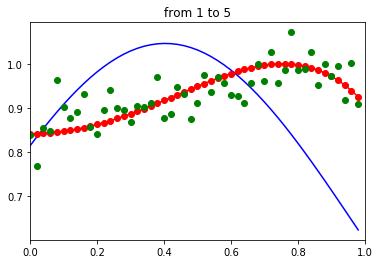

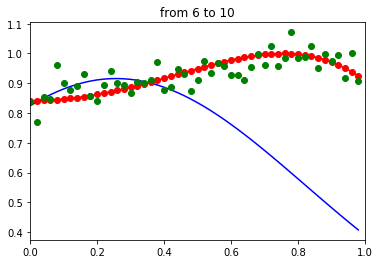

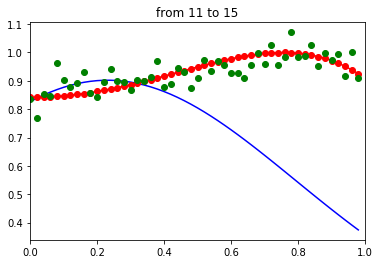

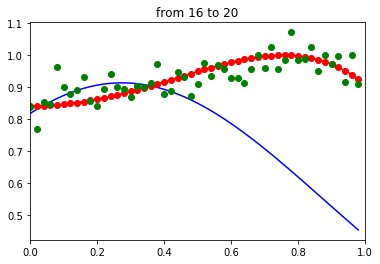

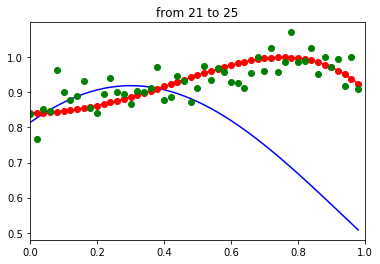

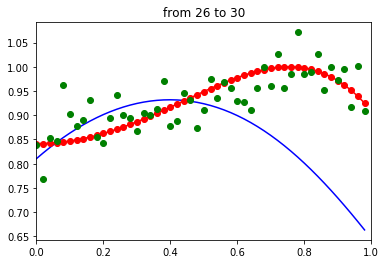

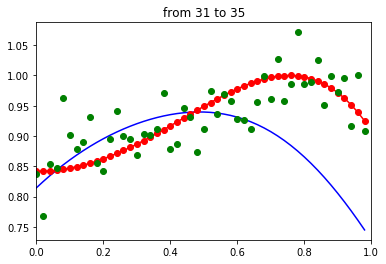

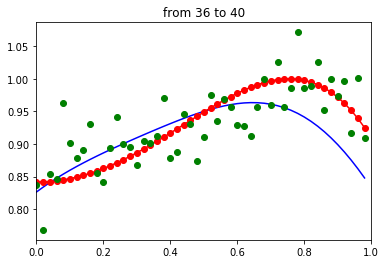

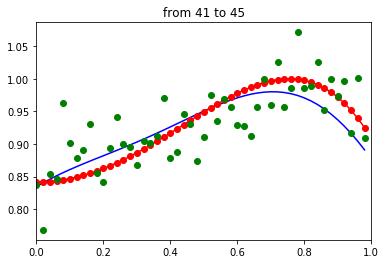

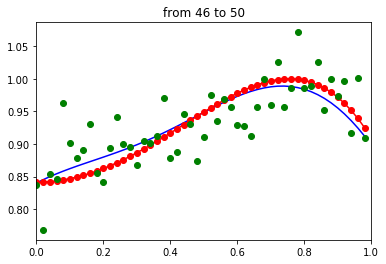

In [15]:
# plot the graph
plt.plot(x, y_estimated_1, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("from 1 to 5")
plt.show()

miu_i = np.arange(0, 1, 1/M)
s_i = 1/(M/2)
N_i = 5

# for loop of sequential learning, ingesting data by 5.
for i in range(1, 10):
    # getting 5 data points
    x_i = x[5*i:5*(i+1)] 
    y_noise_i = y_noise[5*i:5*(i+1)]  

    # training
    phi_i = get_phi_gaussian(x_i, miu_i, s_i, N_i, M)
    s_n_inv = np.linalg.inv(s_n_minus_1) + beta * phi_i.T.dot(phi_i)
    s_n = np.linalg.inv(s_n_inv)
    m_n = s_n.dot(np.linalg.inv(s_n_minus_1).dot(m_n_minus_1) + beta * phi_i.T.dot(y_noise_i))

    # testing
    phi_test_i = get_phi_gaussian(x, miu_i, s_i, N, M)
    y_estimated_i = get_y_estimated(phi_test_i, m_n)
    
    title = "from {start} to {finish}".format(start = 5*i+1, finish = 5*(i+1))
    
    # plot the graph
    plt.plot(x, y_estimated_i, color = 'b')
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, y_noise, 'go')
    plt.xlim(0.0, 1.0)
    plt.title(title)
    plt.show()

    s_n_minus_1 = s_n
    m_n_minus_1 = m_n

5. Discuss how to set M and the basis function's parameters in sequential learning.

When we are setting M, the number of basis, we are still making an abitrary assumption of the complexity of data. Even though we can change the alpha and beta to change the effect of the regularization term, still we have to choose M based on the assumption of the general (not sequential) data pattern before sequential learning even takes place.

Similarly, we also need to set basis function's parameters based on our assumption of the range of the data and the complexity of data pattern. In our case, we assume that the sequential learning takes place from $x = 0$ to $x = 1$, and we have also assume the complexity of data pattern is uniform throughout the range, so we set the mu (the mean of basis) and sigma (the standard diviation of basis) spread out equivalently throughout the range of data. However, this is not really "sequential" learning, becasue we are setting basis based on our assumptions of not sequence of data, but **all** data. If there are more data coming in that go beyond our presumed range of data, then sequential learning, without changing the presumed basis function's parameters, will not successfully curve fit those new data that go beyond our presumed range, as there would be no basis beyond the range to support it.

## Part 3: Predictive Distribution

1. Generate 50 2D-data points using the following function: $y = sin(x^2+1)$

In [16]:
x, y = actual_distribution() 

2. Add Gaussian random noise to the data

In [17]:
y_noise = add_noise(y, sigma = 0.05)

3. Show the original curve line and the noisy data.

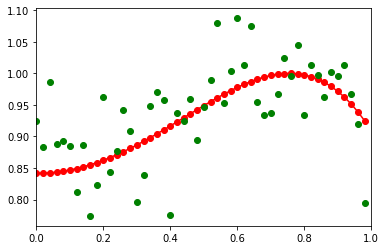

In [18]:
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

4. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data.

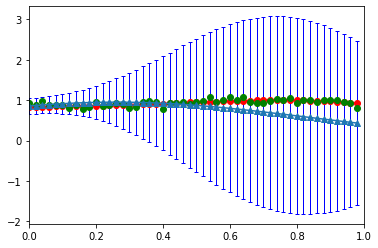

[1]


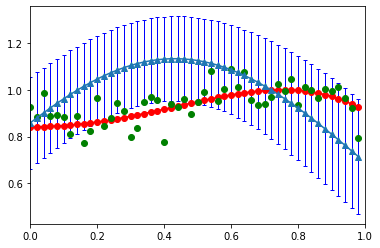

[1, 32]


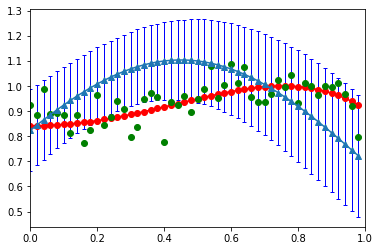

[1, 32, 10]


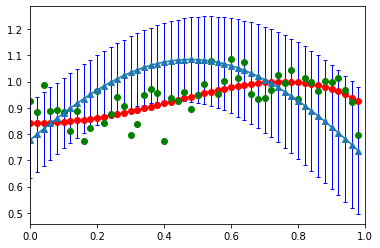

[1, 32, 10, 6]


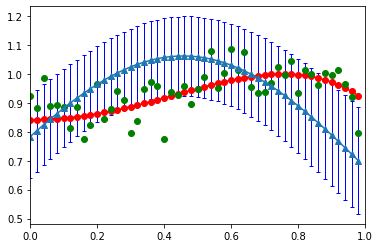

[1, 32, 10, 6, 35]


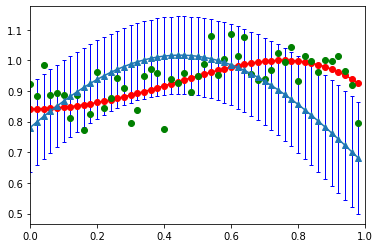

[1, 32, 10, 6, 35, 24]


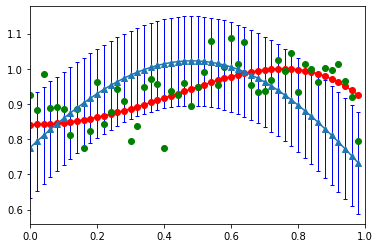

[1, 32, 10, 6, 35, 24, 49]


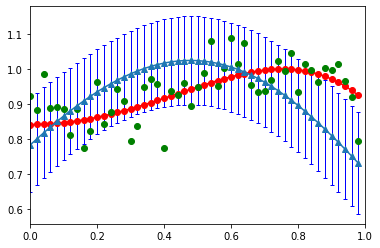

[1, 32, 10, 6, 35, 24, 49, 5]


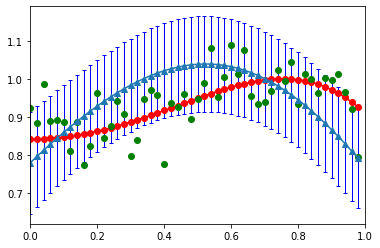

[1, 32, 10, 6, 35, 24, 49, 5, 47]


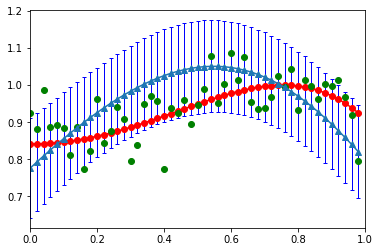

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45]


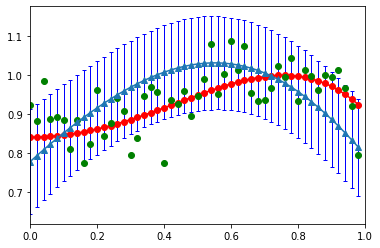

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28]


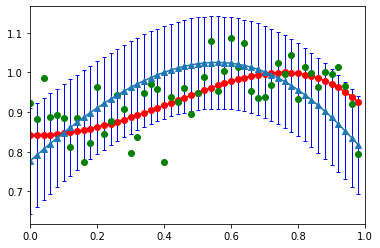

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19]


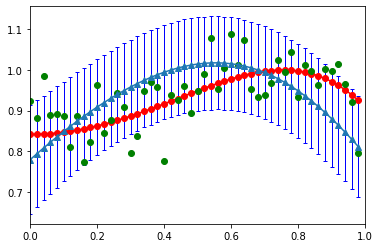

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33]


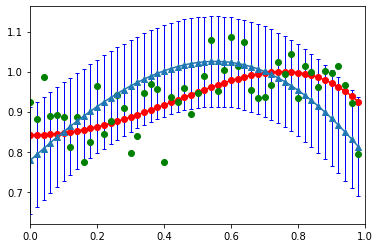

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27]


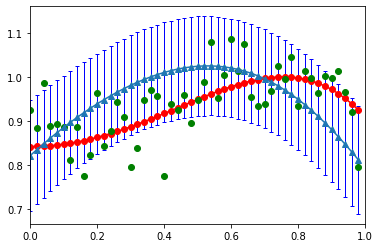

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2]


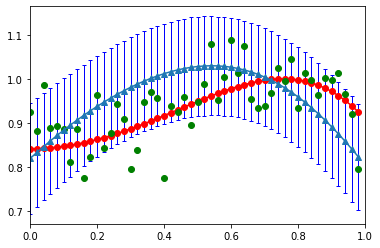

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41]


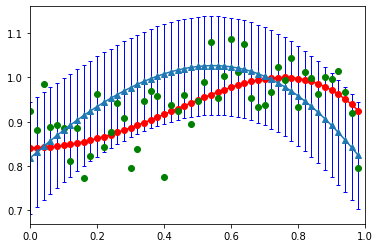

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18]


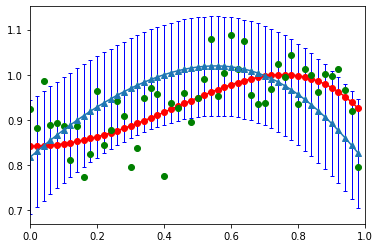

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21]


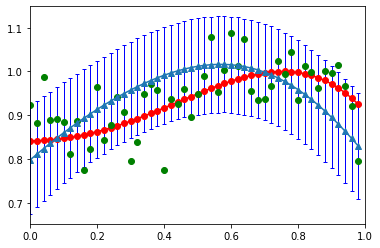

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8]


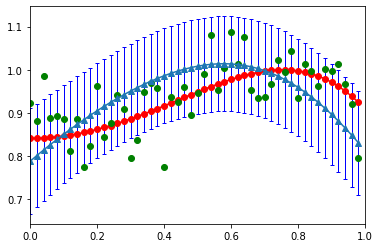

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9]


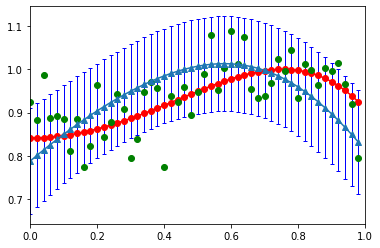

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17]


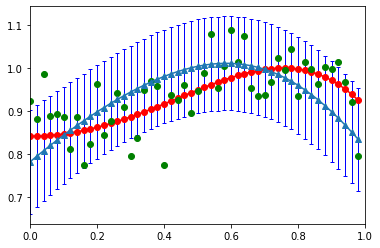

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11]


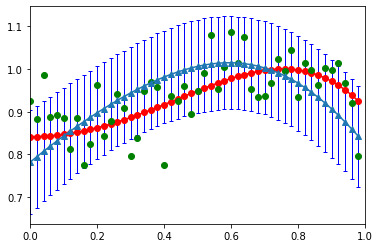

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42]


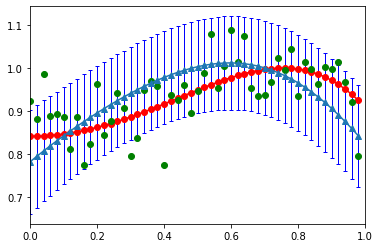

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23]


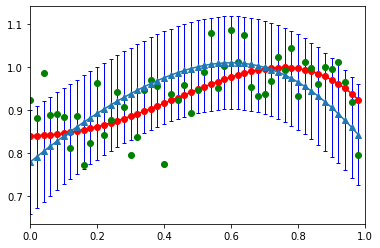

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12]


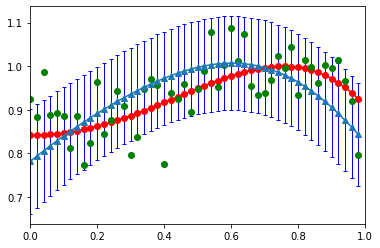

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25]


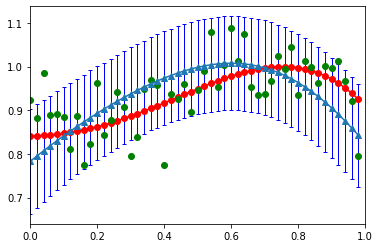

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13]


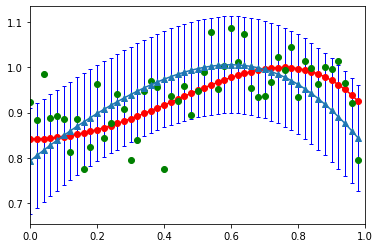

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3]


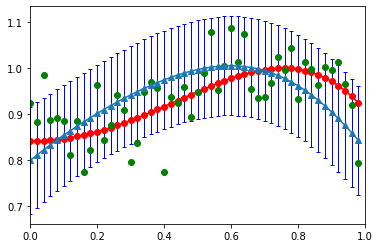

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4]


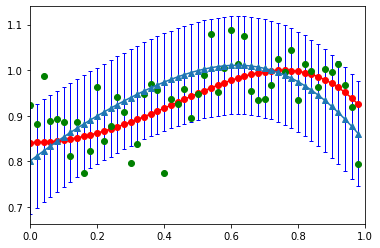

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46]


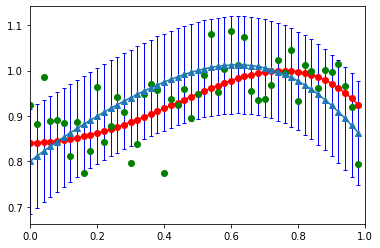

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37]


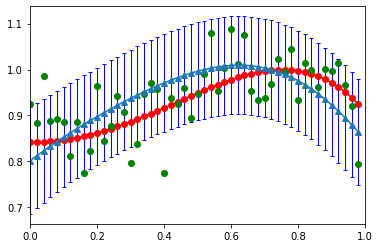

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22]


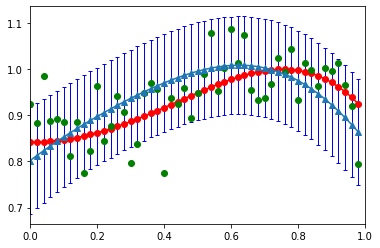

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26]


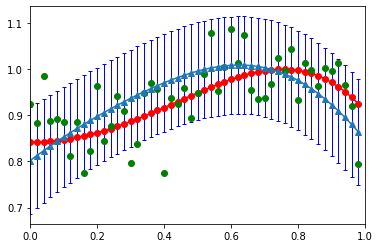

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31]


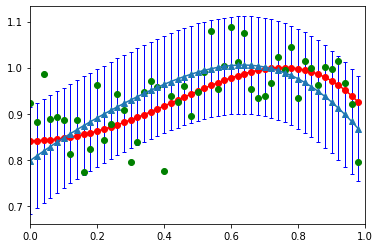

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15]


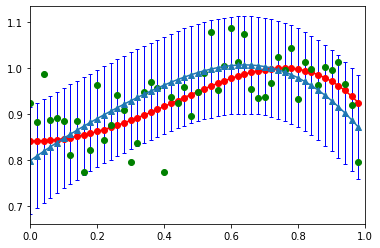

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48]


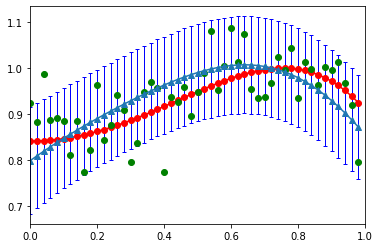

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29]


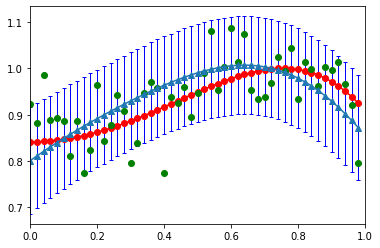

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7]


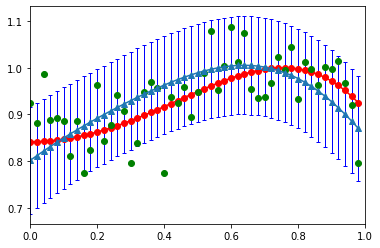

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36]


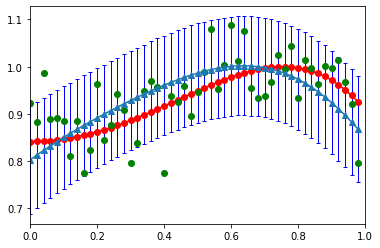

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34]


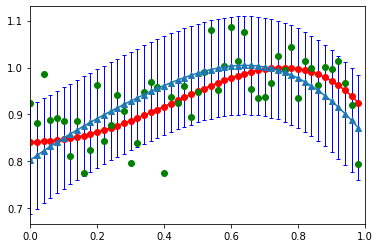

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39]


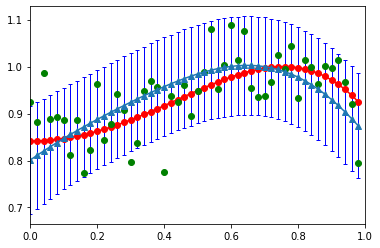

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16]


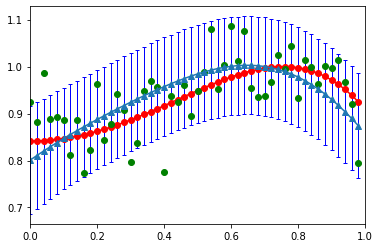

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38]


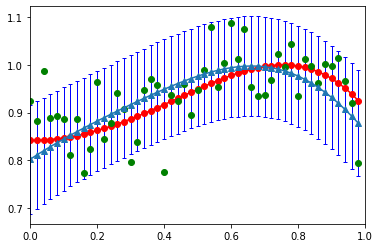

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20]


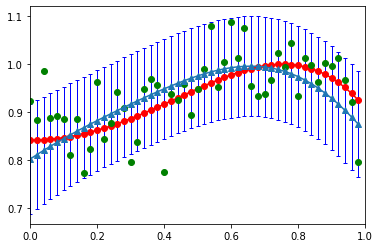

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40]


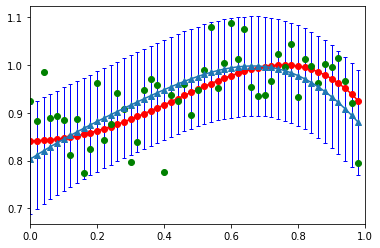

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44]


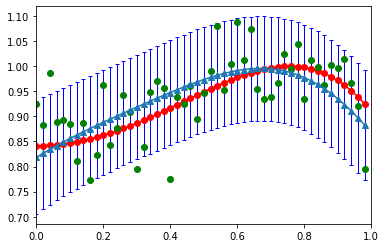

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0]


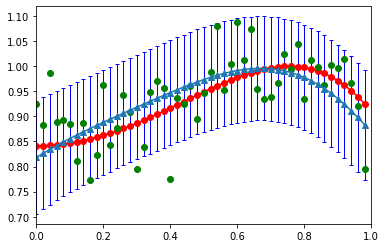

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43]


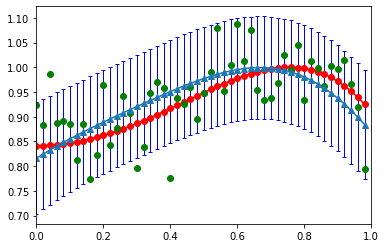

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30]


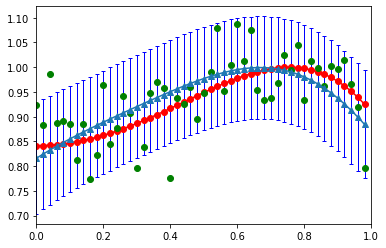

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30, 14]


In [19]:
index_random_list = random.sample(range(50), 50)

beta = 10

M = 4
s_1 = 1/(M/2)
miu_1 = np.arange(0, 1, 1/M)
N_1 = 1

x_1 = [x[index_random_list[0]]]

y_noise_1 = [y_noise[index_random_list[0]]]
phi_1 = get_phi_gaussian(x_1, miu_1, s_1, N_1, M)
X_input = get_input_matrix(x, N, M)

alpha = 0.4

s_n_1 = get_s_n(alpha, beta, phi_1, M)
w_fb_1 = get_w_fb(beta, alpha, M, phi_1, y_noise_1)
m_1 = w_fb_1

s_n_list_1 = []
for x_element in x:
    
    phi_basis_1 = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
    s_new_1 = (1 / beta) + phi_basis_1.T.dot(s_n_1).dot(phi_basis_1)[0][0]
    s_n_list_1.append(s_new_1)

# predicting
phi_test_1 = get_phi_gaussian(x, miu_1, s_1, N, M)
y_estimated_1 = get_y_estimated(phi_test_1, w_fb_1)

# plot the graph
plt.errorbar(x, y_estimated_1, s_n_list_1, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()
print([index_random_list[0]])

# base cases
s_n_minus_1 = s_n_1
m_n_minus_1 = m_1

miu_i = np.arange(0, 1, 1/M)
s_i = 1/(M/2)
N_i = 1

# for loop of sequential learning, ingesting data one by one.
for i in range(1, 50):
    x_i = x[index_random_list[i]] 
    y_noise_i = y_noise[index_random_list[i]]  

    phi_i = get_phi_gaussian([x_i], miu_i, s_i, N_i, M)
    s_n_inv = np.linalg.inv(s_n_minus_1) + beta * phi_i.T.dot(phi_i)
    s_n = np.linalg.inv(s_n_inv)
    m_n = s_n.dot(np.linalg.inv(s_n_minus_1).dot(m_n_minus_1) + beta * phi_i.T.dot([y_noise_i]))
    
    s_n_list_i = []
    for x_element in x:
        phi_basis_i = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
        s_new_i = (1 / beta) + phi_basis_i.T.dot(s_n).dot(phi_basis_i)[0][0]
        s_n_list_i.append(s_new_i)
    
    # predicting
    phi_test_i = get_phi_gaussian(x, miu_i, s_i, N, M)
    y_estimated_i = get_y_estimated(phi_test_i, m_n) 
    
    # plot the graph
    plt.errorbar(x, y_estimated_i, s_n_list_i, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, y_noise, 'go')
    plt.xlim(0.0, 1.0)
    plt.show()
    print(index_random_list[:i+1])

    # updating
    s_n_minus_1 = s_n
    m_n_minus_1 = m_n

5. Experiment with your code by changing beta, and explain what beta is for and how it affects the results.

5.1 increase the value of beta to 10000

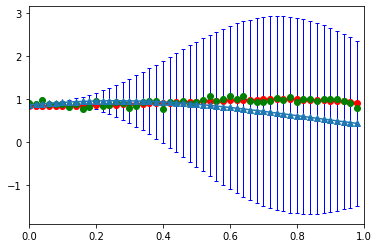

[1]


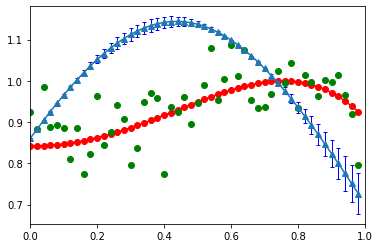

[1, 32]


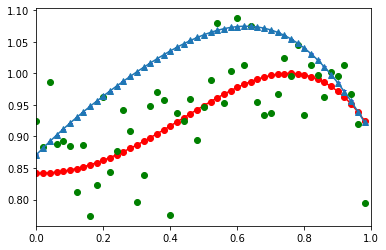

[1, 32, 10]


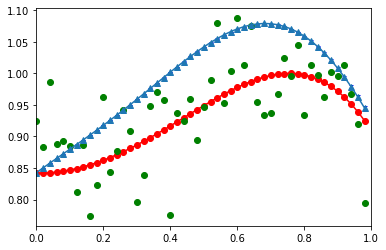

[1, 32, 10, 6]


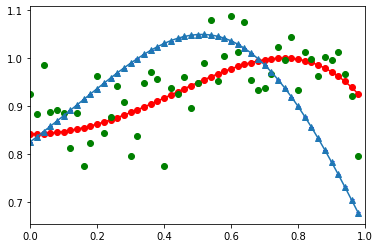

[1, 32, 10, 6, 35]


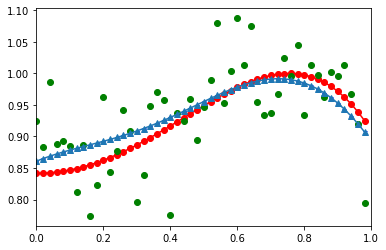

[1, 32, 10, 6, 35, 24]


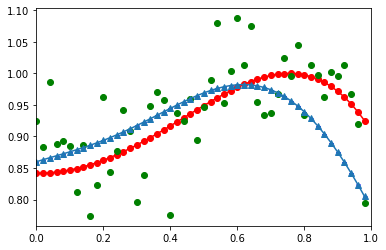

[1, 32, 10, 6, 35, 24, 49]


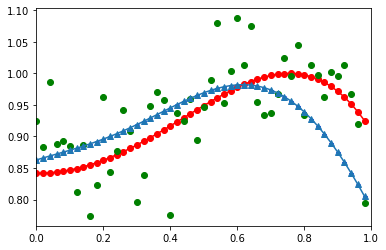

[1, 32, 10, 6, 35, 24, 49, 5]


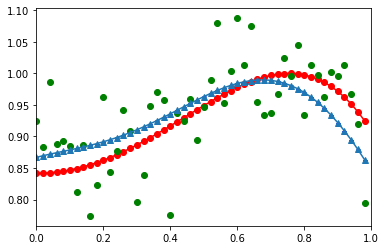

[1, 32, 10, 6, 35, 24, 49, 5, 47]


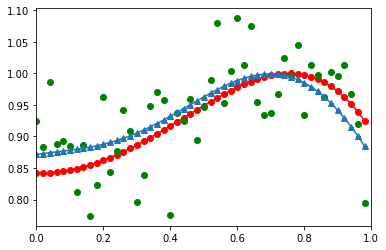

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45]


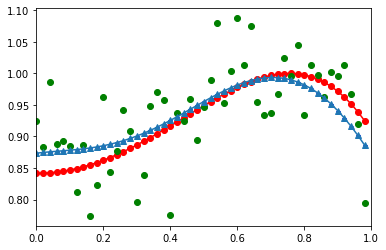

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28]


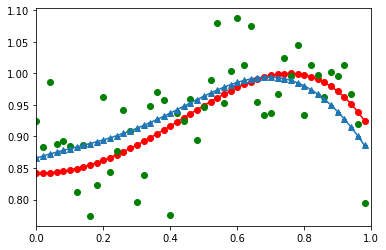

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19]


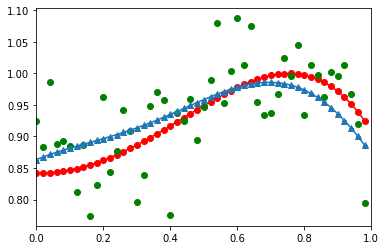

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33]


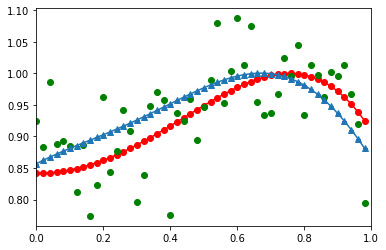

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27]


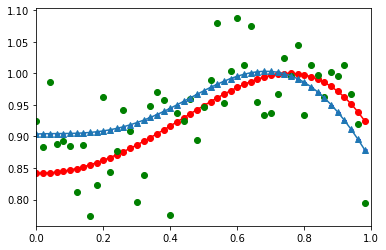

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2]


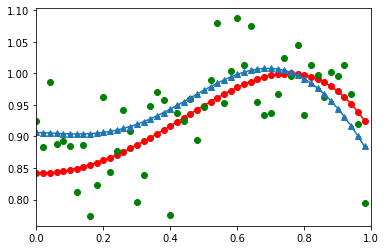

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41]


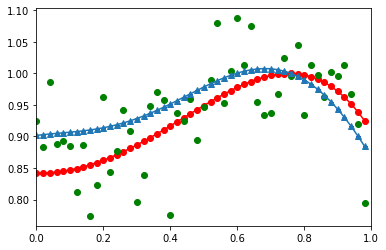

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18]


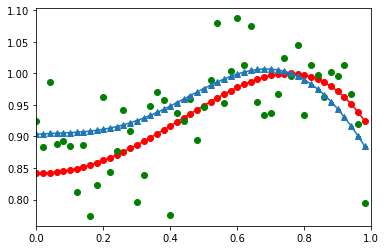

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21]


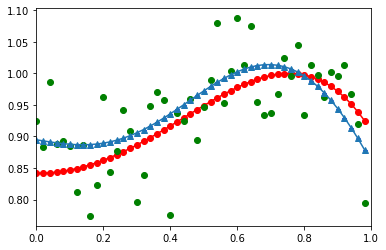

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8]


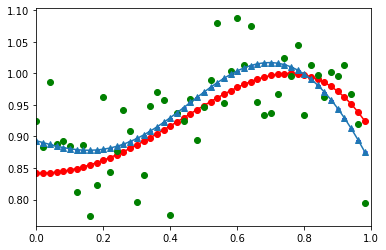

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9]


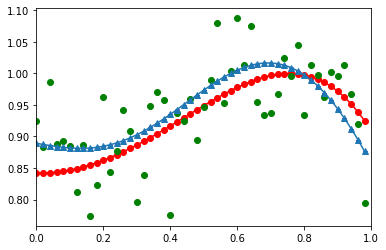

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17]


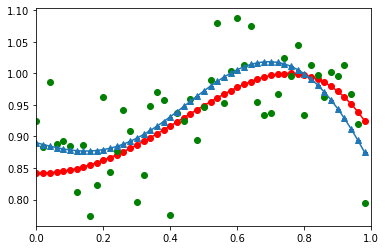

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11]


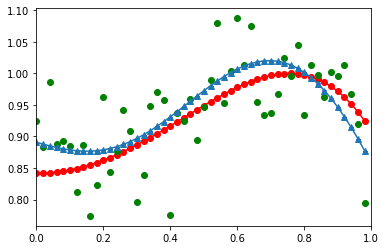

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42]


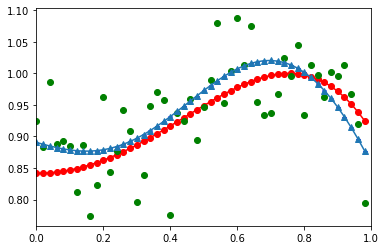

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23]


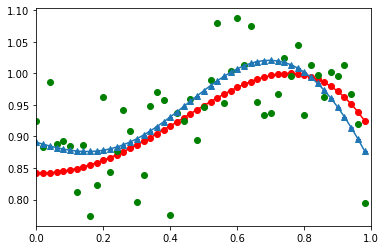

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12]


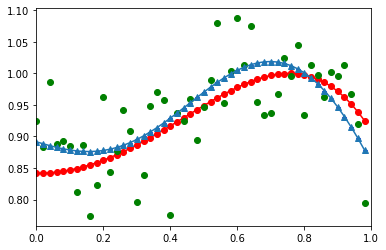

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25]


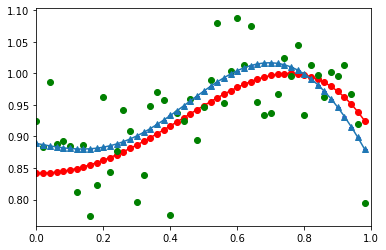

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13]


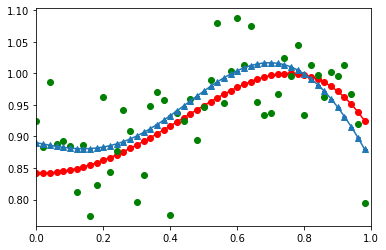

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3]


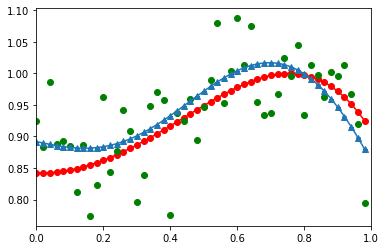

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4]


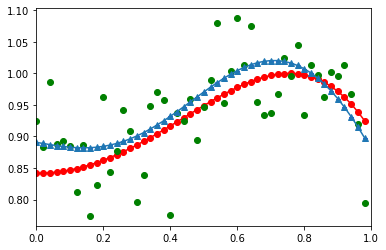

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46]


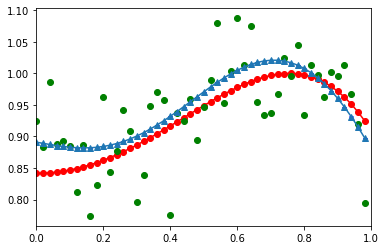

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37]


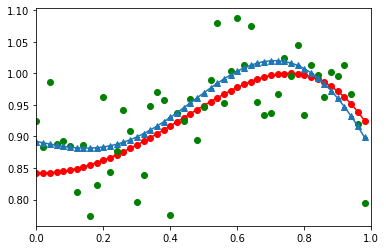

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22]


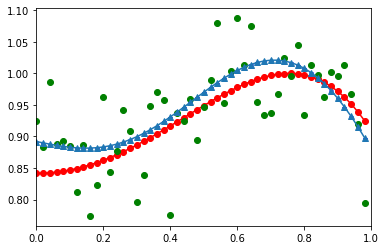

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26]


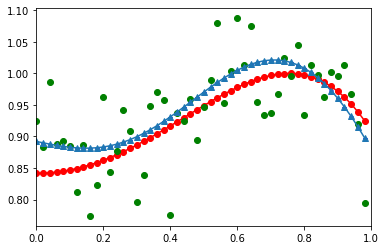

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31]


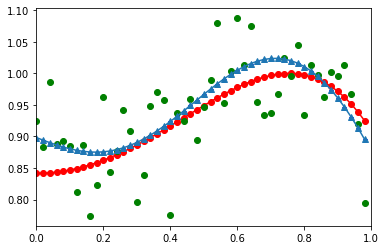

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15]


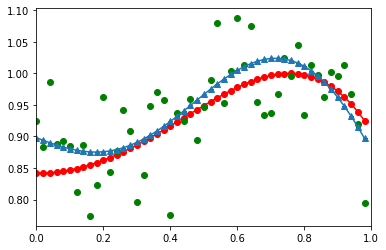

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48]


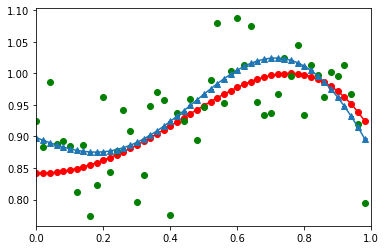

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29]


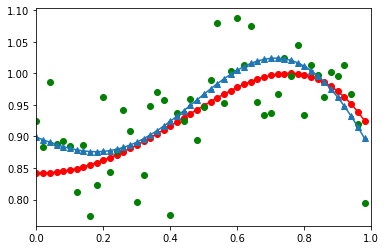

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7]


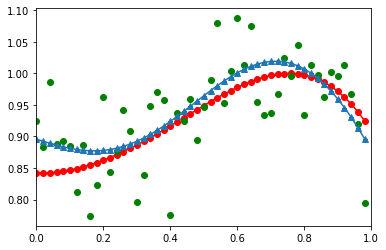

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36]


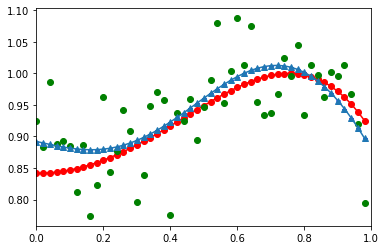

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34]


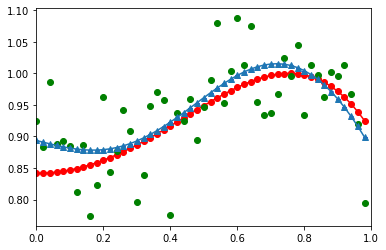

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39]


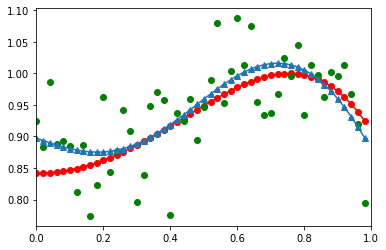

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16]


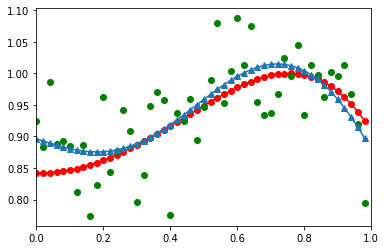

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38]


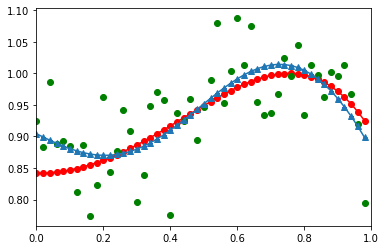

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20]


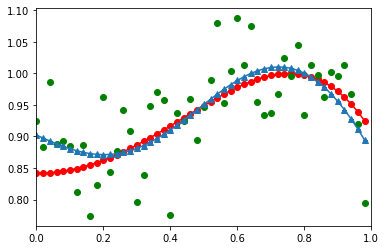

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40]


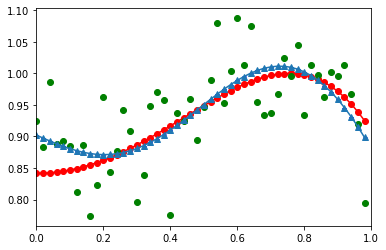

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44]


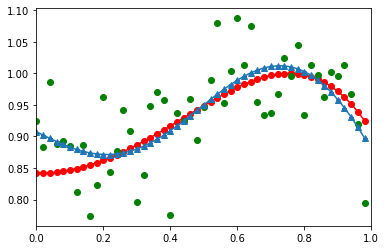

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0]


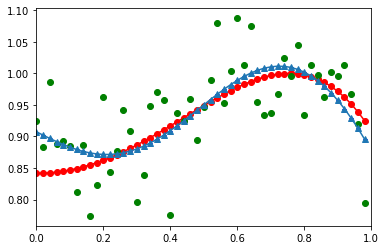

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43]


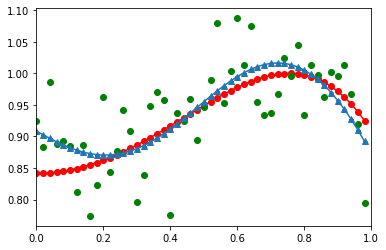

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30]


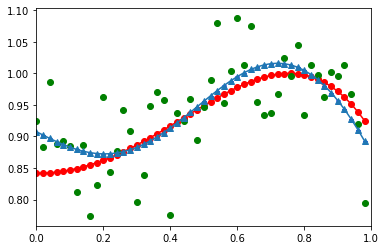

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30, 14]


In [20]:
beta = 10000

M = 4
s_1 = 1/(M/2)
miu_1 = np.arange(0, 1, 1/M)
N_1 = 1

x_1 = [x[index_random_list[0]]]

y_noise_1 = [y_noise[index_random_list[0]]]
phi_1 = get_phi_gaussian(x_1, miu_1, s_1, N_1, M)
X_input = get_input_matrix(x, N, M)

alpha = 0.4

s_n_1 = get_s_n(alpha, beta, phi_1, M)
w_fb_1 = get_w_fb(beta, alpha, M, phi_1, y_noise_1)
m_1 = w_fb_1

s_n_list_1 = []
for x_element in x:
    
    phi_basis_1 = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
    s_new_1 = (1 / beta) + phi_basis_1.T.dot(s_n_1).dot(phi_basis_1)[0][0]
    s_n_list_1.append(s_new_1)

# predicting
phi_test_1 = get_phi_gaussian(x, miu_1, s_1, N, M)
y_estimated_1 = get_y_estimated(phi_test_1, w_fb_1)

# plot the graph
plt.errorbar(x, y_estimated_1, s_n_list_1, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()
print([index_random_list[0]])

# base cases
s_n_minus_1 = s_n_1
m_n_minus_1 = m_1

miu_i = np.arange(0, 1, 1/M)
s_i = 1/(M/2)
N_i = 1

# for loop of sequential learning, ingesting data one by one.
for i in range(1, 50):
    x_i = x[index_random_list[i]] 
    y_noise_i = y_noise[index_random_list[i]]  

    phi_i = get_phi_gaussian([x_i], miu_i, s_i, N_i, M)
    s_n_inv = np.linalg.inv(s_n_minus_1) + beta * phi_i.T.dot(phi_i)
    s_n = np.linalg.inv(s_n_inv)
    m_n = s_n.dot(np.linalg.inv(s_n_minus_1).dot(m_n_minus_1) + beta * phi_i.T.dot([y_noise_i]))
    
    s_n_list_i = []
    for x_element in x:
        phi_basis_i = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
        s_new_i = (1 / beta) + phi_basis_i.T.dot(s_n).dot(phi_basis_i)[0][0]
        s_n_list_i.append(s_new_i)
    
    # predicting
    phi_test_i = get_phi_gaussian(x, miu_i, s_i, N, M)
    y_estimated_i = get_y_estimated(phi_test_i, m_n) 
    
    # plot the graph
    plt.errorbar(x, y_estimated_i, s_n_list_i, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, y_noise, 'go')
    plt.xlim(0.0, 1.0)
    plt.show()
    print(index_random_list[:i+1])

    # updating
    s_n_minus_1 = s_n
    m_n_minus_1 = m_n

5.2 decrease the value of beta to 2

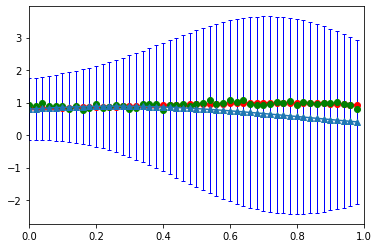

[1]


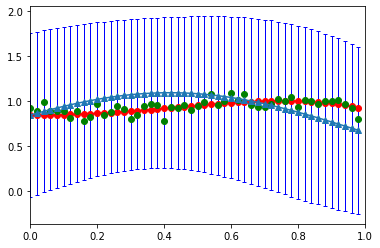

[1, 32]


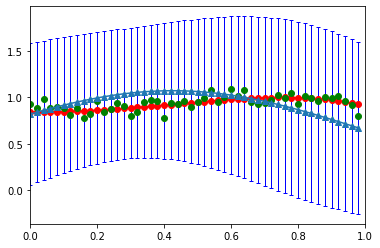

[1, 32, 10]


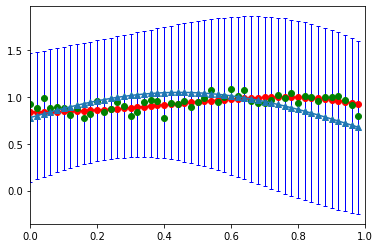

[1, 32, 10, 6]


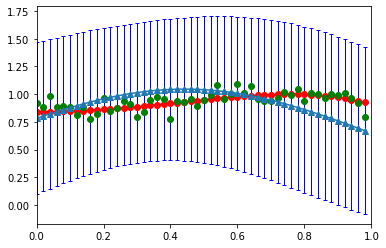

[1, 32, 10, 6, 35]


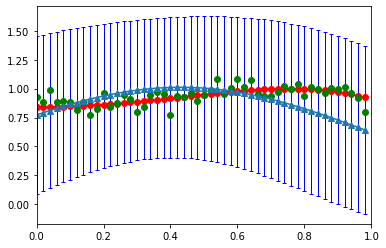

[1, 32, 10, 6, 35, 24]


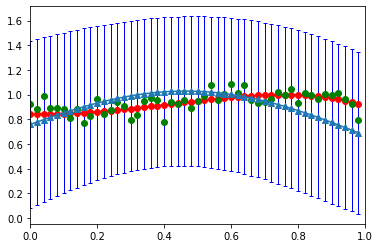

[1, 32, 10, 6, 35, 24, 49]


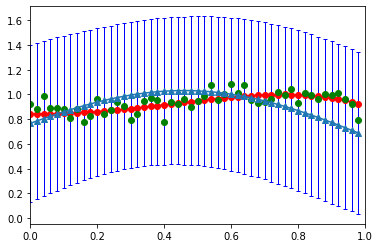

[1, 32, 10, 6, 35, 24, 49, 5]


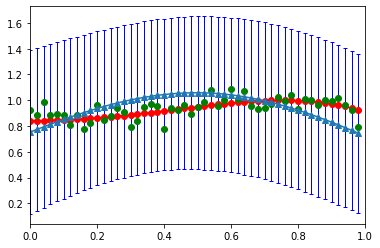

[1, 32, 10, 6, 35, 24, 49, 5, 47]


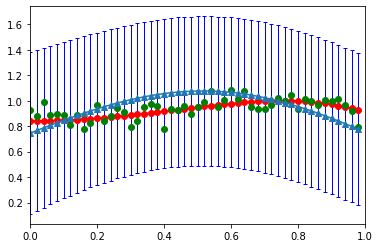

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45]


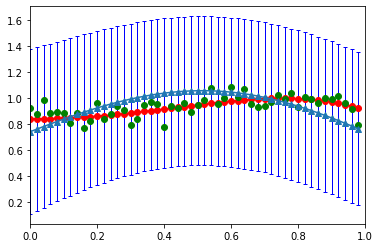

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28]


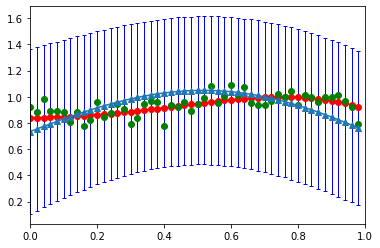

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19]


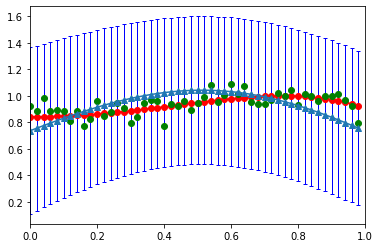

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33]


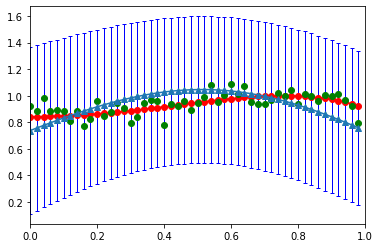

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27]


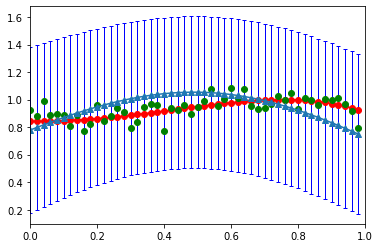

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2]


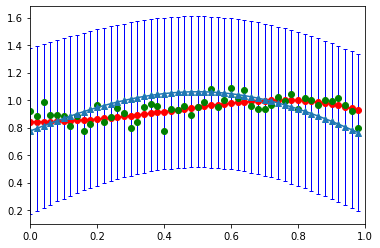

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41]


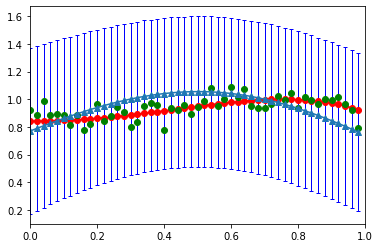

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18]


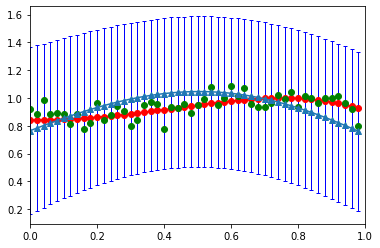

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21]


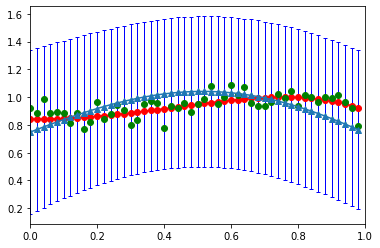

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8]


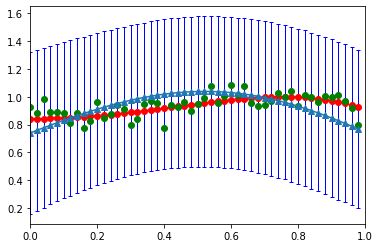

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9]


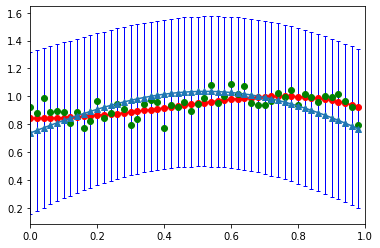

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17]


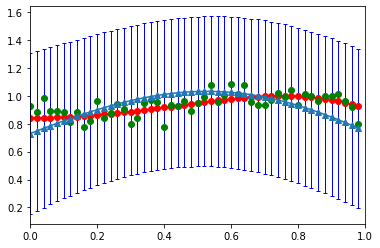

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11]


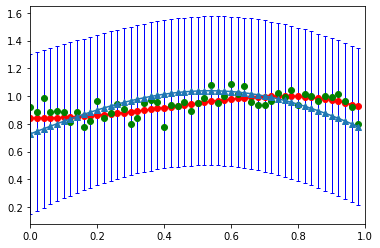

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42]


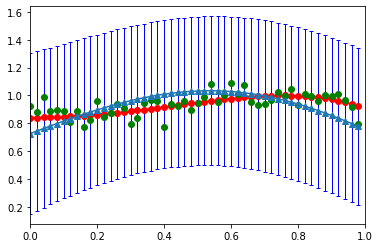

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23]


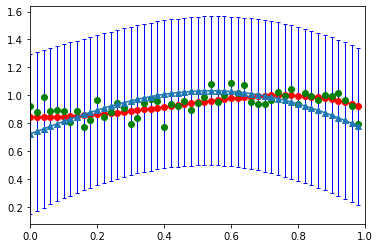

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12]


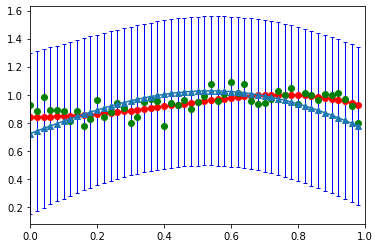

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25]


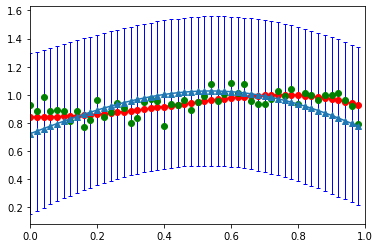

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13]


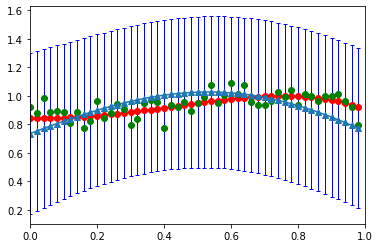

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3]


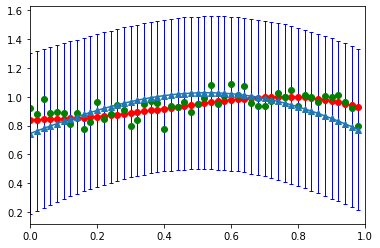

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4]


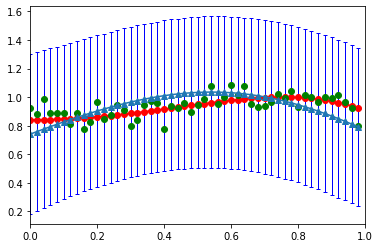

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46]


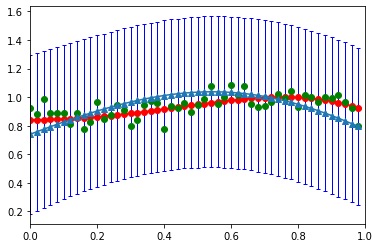

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37]


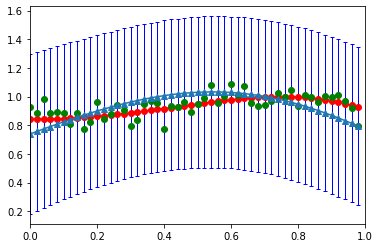

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22]


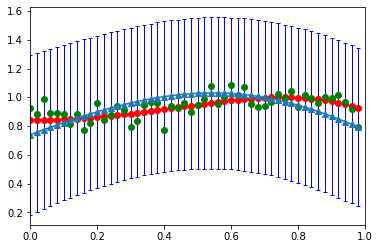

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26]


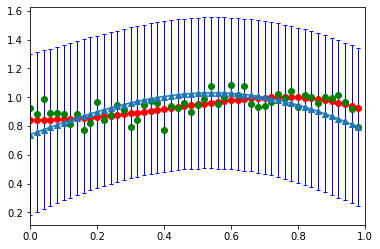

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31]


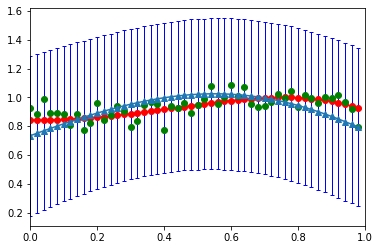

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15]


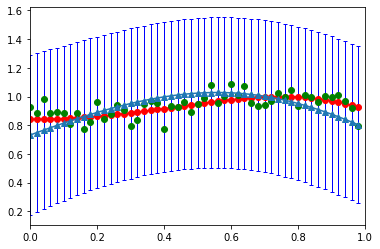

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48]


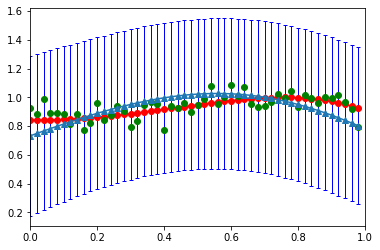

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29]


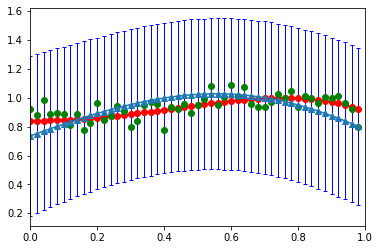

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7]


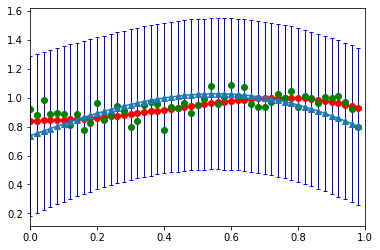

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36]


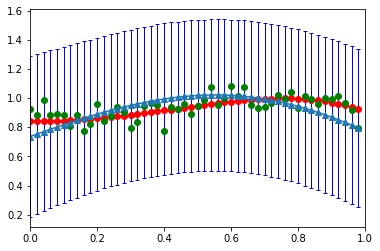

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34]


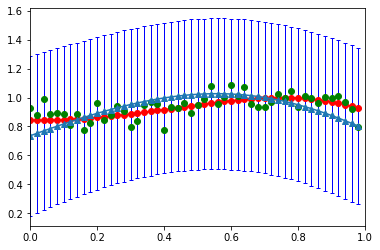

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39]


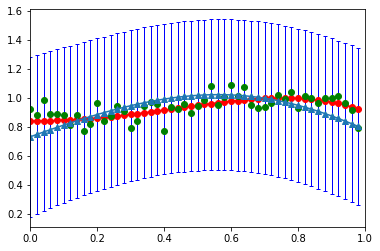

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16]


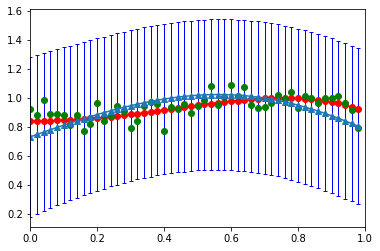

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38]


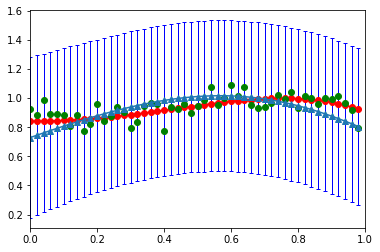

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20]


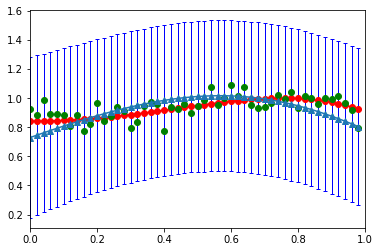

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40]


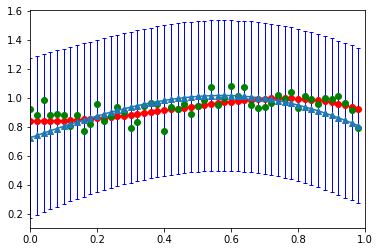

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44]


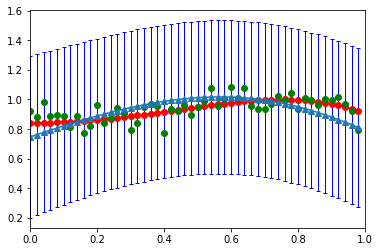

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0]


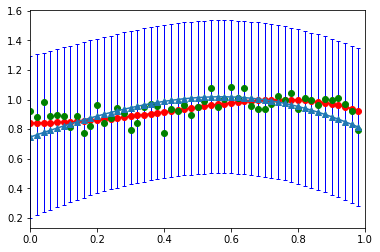

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43]


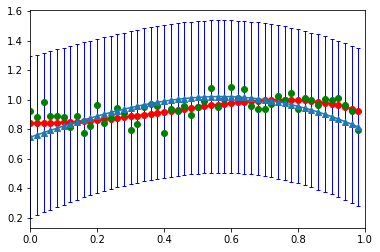

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30]


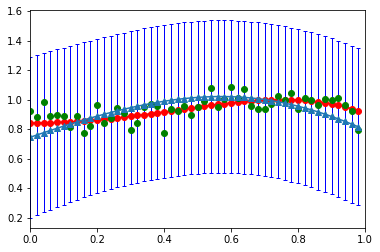

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30, 14]


In [21]:
beta = 2

M = 4
s_1 = 1/(M/2)
miu_1 = np.arange(0, 1, 1/M)
N_1 = 1

x_1 = [x[index_random_list[0]]]

y_noise_1 = [y_noise[index_random_list[0]]]
phi_1 = get_phi_gaussian(x_1, miu_1, s_1, N_1, M)
X_input = get_input_matrix(x, N, M)

alpha = 0.4

s_n_1 = get_s_n(alpha, beta, phi_1, M)
w_fb_1 = get_w_fb(beta, alpha, M, phi_1, y_noise_1)
m_1 = w_fb_1

s_n_list_1 = []
for x_element in x:
    
    phi_basis_1 = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
    s_new_1 = (1 / beta) + phi_basis_1.T.dot(s_n_1).dot(phi_basis_1)[0][0]
    s_n_list_1.append(s_new_1)

# predicting
phi_test_1 = get_phi_gaussian(x, miu_1, s_1, N, M)
y_estimated_1 = get_y_estimated(phi_test_1, w_fb_1)

# plot the graph
plt.errorbar(x, y_estimated_1, s_n_list_1, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()
print([index_random_list[0]])

# base cases
s_n_minus_1 = s_n_1
m_n_minus_1 = m_1

miu_i = np.arange(0, 1, 1/M)
s_i = 1/(M/2)
N_i = 1

# for loop of sequential learning, ingesting data one by one.
for i in range(1, 50):
    x_i = x[index_random_list[i]] 
    y_noise_i = y_noise[index_random_list[i]]  

    phi_i = get_phi_gaussian([x_i], miu_i, s_i, N_i, M)
    s_n_inv = np.linalg.inv(s_n_minus_1) + beta * phi_i.T.dot(phi_i)
    s_n = np.linalg.inv(s_n_inv)
    m_n = s_n.dot(np.linalg.inv(s_n_minus_1).dot(m_n_minus_1) + beta * phi_i.T.dot([y_noise_i]))
    
    s_n_list_i = []
    for x_element in x:
        phi_basis_i = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
        s_new_i = (1 / beta) + phi_basis_i.T.dot(s_n).dot(phi_basis_i)[0][0]
        s_n_list_i.append(s_new_i)
    
    # predicting
    phi_test_i = get_phi_gaussian(x, miu_i, s_i, N, M)
    y_estimated_i = get_y_estimated(phi_test_i, m_n) 
    
    # plot the graph
    plt.errorbar(x, y_estimated_i, s_n_list_i, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, y_noise, 'go')
    plt.xlim(0.0, 1.0)
    plt.show()
    print(index_random_list[:i+1])

    # updating
    s_n_minus_1 = s_n
    m_n_minus_1 = m_n

5.3 We will discuss two results with regards to changing beta: the prediction of new data and the range of uncertainty of new data.

For prediction of new data, since beta is also the denominator of the coefficient of regularization term, so as beta increases, coefficient will decrease and regularization will become more effective (here, nothing is new compared to the sequential learning).

But for predictive distribution, we are also interested in the uncertainty of new data (how certain is our model in predicting new data). Interestingly, the range of uncertainty heavily depends on beta. If we increase beta to 10000 (as in the first scenario), the range of uncertainty will quickly drop to extremely small after a few sequential ingestion of data. While if we decrease beta to 2 (as in the second secnario), the range of uncertainty will increase to relatively large in comparison.

Mathematically, it is not hard to understand. If we look at the equation for standard deviation for Gaussian distribution that calculates the predictive distribution, we will find that $$S_* = \beta^{-1} + \phi^T (x_*)\mathbb{S}_N \phi (x_*).$$ If we decrease the value of beta, we will find that $S_*$ increases. 

Intuitively, the inverse of beta represent the noise level of training data (or we could say the *assumption* we have for the noise level of new data). If the noise level is large, then we are more likely to be uncertain with our new prediction. One the other hand, if the noise level is small, then we are more likely to be very certain with our new prediction.


6. Show your best prediction results for all 50 data one by one:

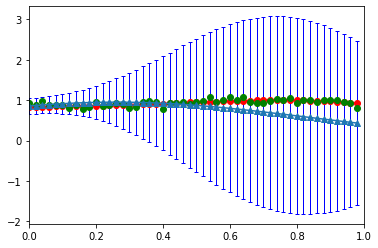

[1]


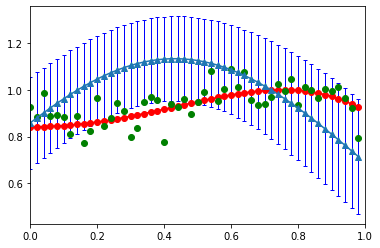

[1, 32]


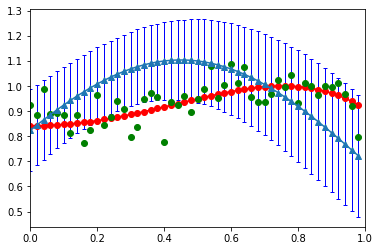

[1, 32, 10]


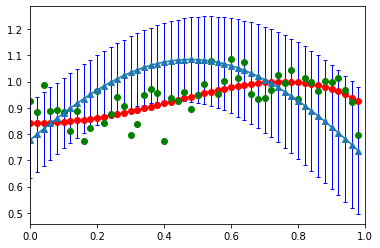

[1, 32, 10, 6]


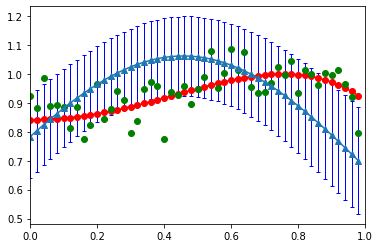

[1, 32, 10, 6, 35]


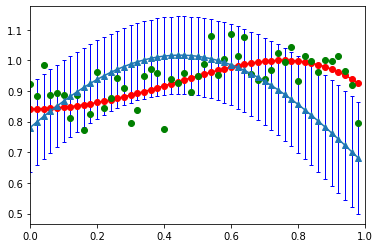

[1, 32, 10, 6, 35, 24]


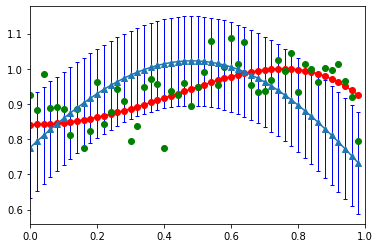

[1, 32, 10, 6, 35, 24, 49]


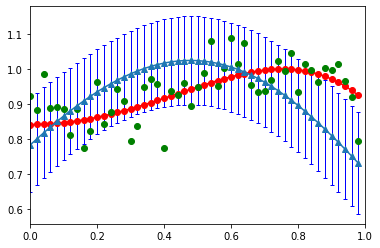

[1, 32, 10, 6, 35, 24, 49, 5]


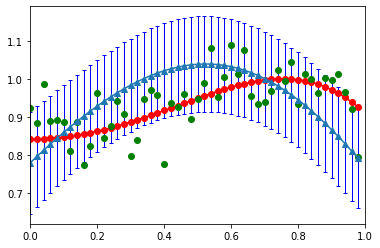

[1, 32, 10, 6, 35, 24, 49, 5, 47]


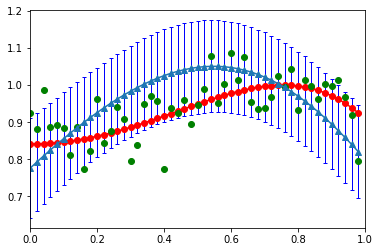

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45]


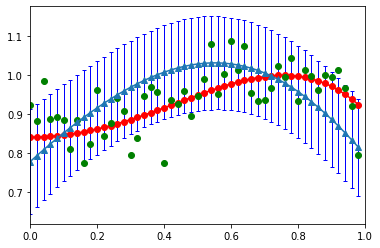

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28]


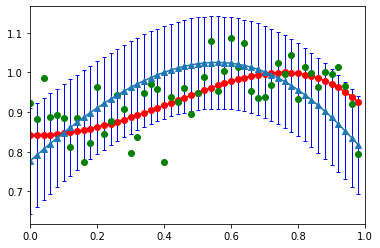

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19]


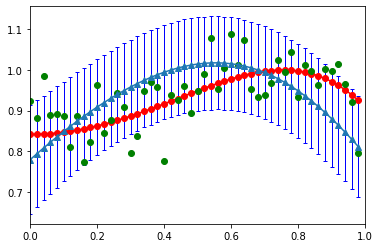

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33]


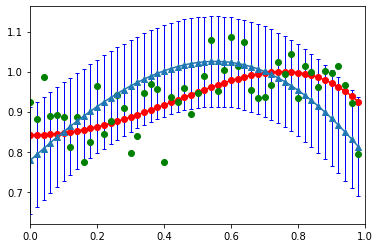

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27]


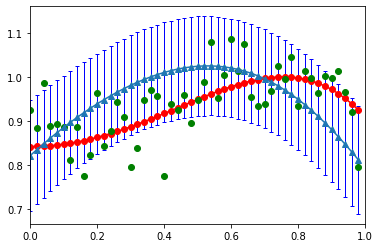

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2]


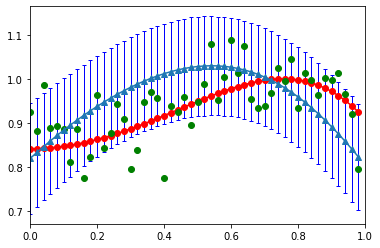

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41]


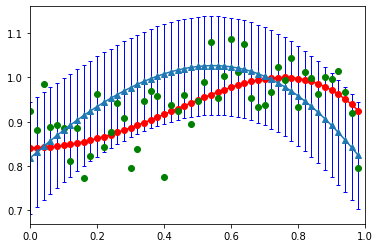

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18]


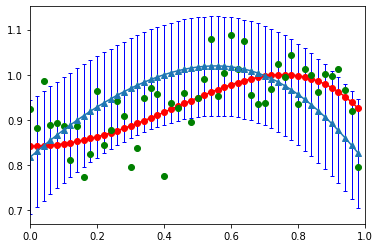

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21]


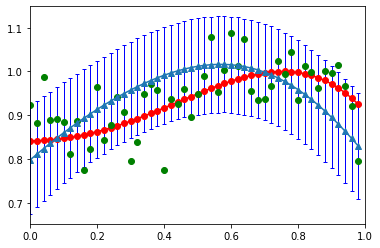

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8]


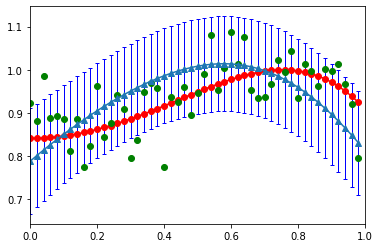

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9]


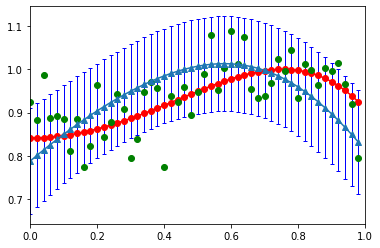

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17]


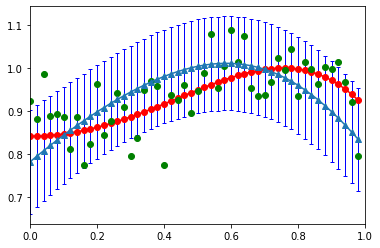

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11]


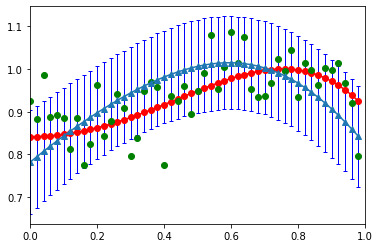

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42]


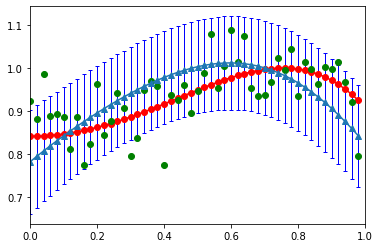

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23]


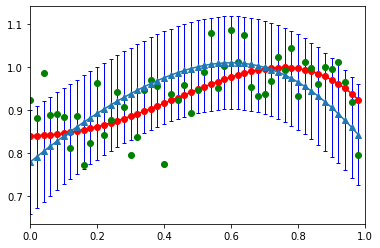

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12]


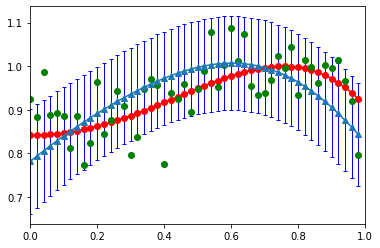

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25]


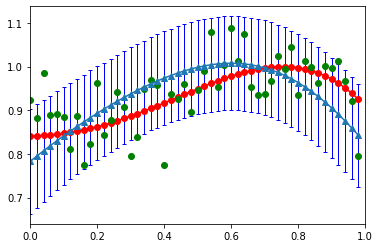

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13]


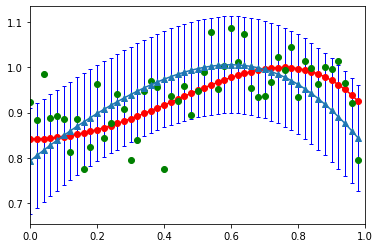

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3]


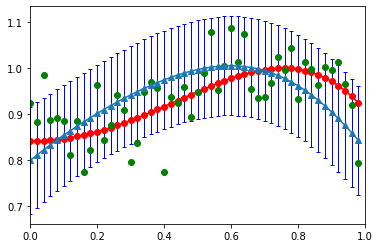

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4]


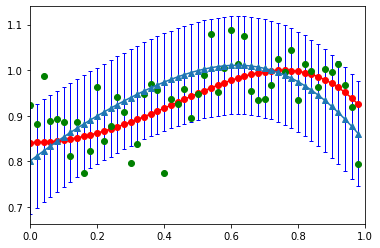

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46]


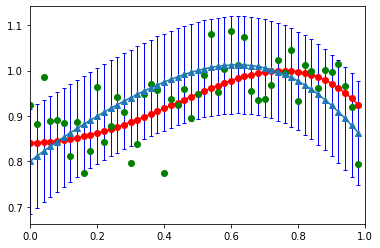

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37]


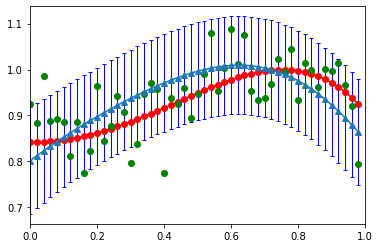

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22]


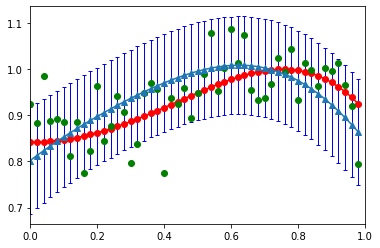

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26]


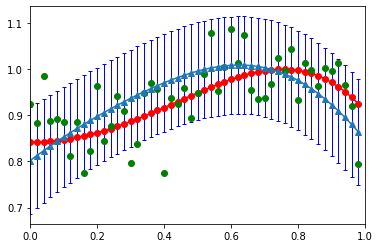

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31]


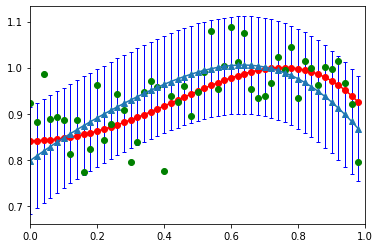

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15]


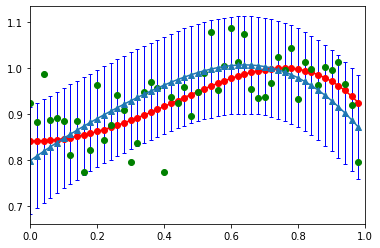

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48]


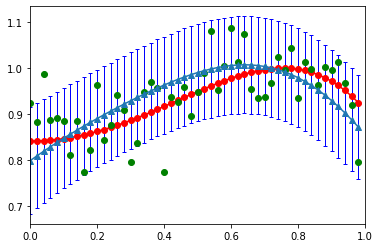

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29]


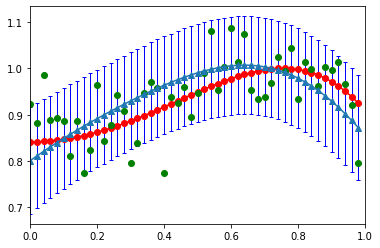

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7]


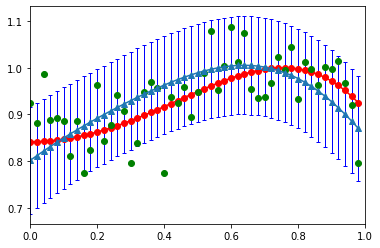

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36]


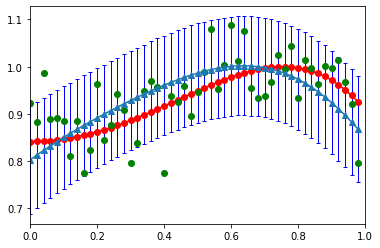

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34]


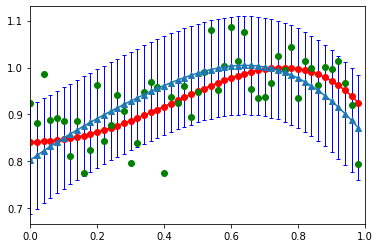

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39]


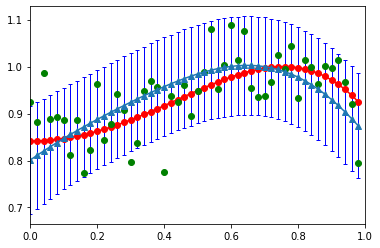

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16]


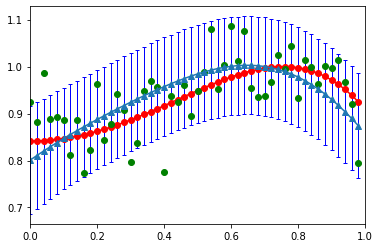

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38]


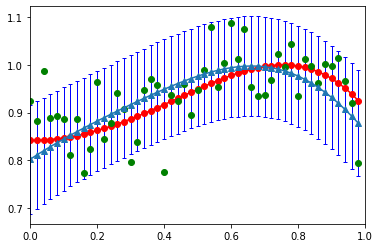

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20]


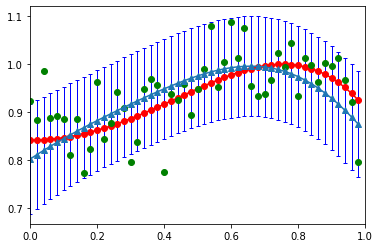

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40]


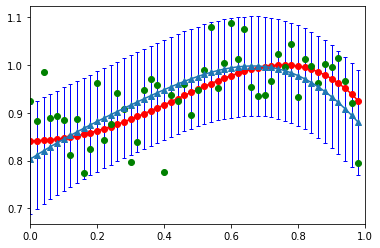

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44]


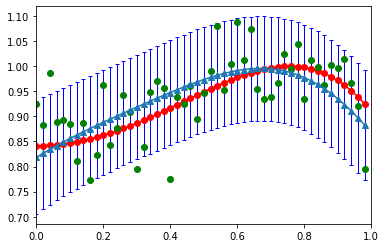

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0]


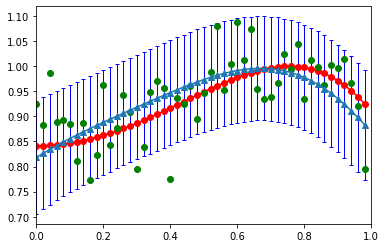

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43]


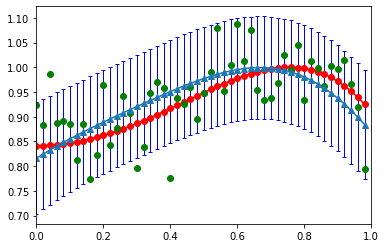

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30]


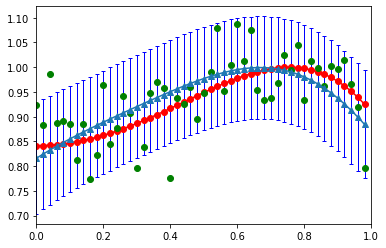

[1, 32, 10, 6, 35, 24, 49, 5, 47, 45, 28, 19, 33, 27, 2, 41, 18, 21, 8, 9, 17, 11, 42, 23, 12, 25, 13, 3, 4, 46, 37, 22, 26, 31, 15, 48, 29, 7, 36, 34, 39, 16, 38, 20, 40, 44, 0, 43, 30, 14]


In [22]:
beta = 10

M = 4
s_1 = 1/(M/2)
miu_1 = np.arange(0, 1, 1/M)
N_1 = 1

x_1 = [x[index_random_list[0]]]

y_noise_1 = [y_noise[index_random_list[0]]]
phi_1 = get_phi_gaussian(x_1, miu_1, s_1, N_1, M)
X_input = get_input_matrix(x, N, M)

alpha = 0.4

s_n_1 = get_s_n(alpha, beta, phi_1, M)
w_fb_1 = get_w_fb(beta, alpha, M, phi_1, y_noise_1)
m_1 = w_fb_1

s_n_list_1 = []
for x_element in x:
    
    phi_basis_1 = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
    s_new_1 = (1 / beta) + phi_basis_1.T.dot(s_n_1).dot(phi_basis_1)[0][0]
    s_n_list_1.append(s_new_1)

# predicting
phi_test_1 = get_phi_gaussian(x, miu_1, s_1, N, M)
y_estimated_1 = get_y_estimated(phi_test_1, w_fb_1)

# plot the graph
plt.errorbar(x, y_estimated_1, s_n_list_1, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()
print([index_random_list[0]])

# base cases
s_n_minus_1 = s_n_1
m_n_minus_1 = m_1

miu_i = np.arange(0, 1, 1/M)
s_i = 1/(M/2)
N_i = 1

# for loop of sequential learning, ingesting data one by one.
for i in range(1, 50):
    x_i = x[index_random_list[i]] 
    y_noise_i = y_noise[index_random_list[i]]  

    phi_i = get_phi_gaussian([x_i], miu_i, s_i, N_i, M)
    s_n_inv = np.linalg.inv(s_n_minus_1) + beta * phi_i.T.dot(phi_i)
    s_n = np.linalg.inv(s_n_inv)
    m_n = s_n.dot(np.linalg.inv(s_n_minus_1).dot(m_n_minus_1) + beta * phi_i.T.dot([y_noise_i]))
    
    s_n_list_i = []
    for x_element in x:
        phi_basis_i = get_phi_gaussian([x_element], miu_1, s_1, 1, M).T
        s_new_i = (1 / beta) + phi_basis_i.T.dot(s_n).dot(phi_basis_i)[0][0]
        s_n_list_i.append(s_new_i)
    
    # predicting
    phi_test_i = get_phi_gaussian(x, miu_i, s_i, N, M)
    y_estimated_i = get_y_estimated(phi_test_i, m_n) 
    
    # plot the graph
    plt.errorbar(x, y_estimated_i, s_n_list_i, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, y_noise, 'go')
    plt.xlim(0.0, 1.0)
    plt.show()
    print(index_random_list[:i+1])

    # updating
    s_n_minus_1 = s_n
    m_n_minus_1 = m_n

7. Explain why the predictive distribution is better than the original form of the full Bayesian inference (part I),

For the predictive distribution, it gives you the estimation of **new** data point and also the uncertainty of these new data. It means that given the training data, we can intrapolate or extrapolate the predicaton of all possible values, and know the uncertainty of all of them. While for full Basyesian inference, we would only know how good is our model at predicting training data and getting the uncertainty of those "predictions". Therefore, full Bayesian is mainly good for training purpose but may not be so good for long-term prediction because unlike predictive distribution, the model does not take account for all possible predictions afterwards.

Therefore, this will lead to another advantage of predictive distribution, which is that predictive distribution uses a dynamic model, while in full Bayesian, the prediction model is static. In predictive distribution, the prediction model will get updated every time the model has ingested a new data point. The model will not only make prediction based on previous data, but also changed when new information is available. 

However, for full Bayesian, this is not the case: once the model has been produced in the training stage, the model is static. After training stage, model will no change based on the new data. Therefore, predictvie distribution is better because the prediction model can adapt to new data while the original form of the full Bayesian cannot do so. 

8. Discuss the differences between p(t_new|t) and p(w|t).

The difference on the surface is obvious: p(t_new|t) is a probability function that given the training data, it gives you a Gaussian distribution on the **new** data with two information: prediction for the new data (which is the mean of the Gaussian distribution) and uncertainty of the prediction of new data (which is the standard deviation of the Gaussian distribution). p(w|t) is a probability function that given the training data, it gives you a Gaussian distribution on the **model parameters** $\bar{w}$ with two information: best predicted $\bar{w}$ that maximizes the posterior probability (which is the mean of the Gaussian distribution) and uncertainty of that predicted $\bar{w}$ (which is the standard deviation of the Gaussian distribtuion).

This means that for p(t_new|t), we will know the probability of all possible input data, and we know the most probable prediction. Whereas for p(w|t), we will only know the probability of the model parameters for certain M, and we will only know the most probable model parameter $\bar{w}$.

This difference also lies in how they are computed differently. If we look into p(t_new|t), we find that $$p(t_*|\bar{t}) = \int p(t_*|\bar{w}) p(\bar{w}|\bar{t})d\bar{w}.$$ The prior of the predictive distribution is actually full Bayesian, which describes the whole prediction model. Whereas the prior of p(w|t), the full Bayesian, is p(w), which only describes our assumption of model parameters.